In [1]:
import sys

In [7]:
sys.path

['C:\\Users\\Nejako\\Documents\\MLG',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\Nejako\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin',
 'x:\\downloads\\sketchgraphs\\sketchgraphs']

315228
NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': -1.2246467991473532e-16, 'pntX': 0.01264367759227753, 'pntY': -0.020000000000000004, 'startParam': -0.05235632240772247, 'endParam': 0.07764367759227753})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
NodeOp(label=<SubnodeType.SN_End: 102>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(3, 1), parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': -1.2246467991473532e-16, 'pntX': -2.1783228766819863e-18, 'pntY': 0.019999999999999997, 'startParam': -0.065, 'endParam': 0.065})
EdgeOp(label=<ConstraintType.Parallel: 5>, references=(4, 1), parameters={})
EdgeOp(label=<ConstraintType.Horizontal: 4>, references=(4,), parameters={})
EdgeOp(label=<ConstraintType.Distance: 3>, r

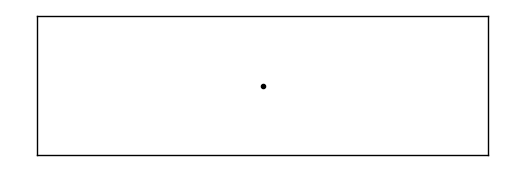

In [13]:
import sketchgraphs.data as datalib
import sketchgraphs
import random
from sketchgraphs.data import flat_array
seq_data = flat_array.load_dictionary_flat('datasets/sg_t16_validation.npy')
print(len(seq_data['sequences']))

seq = seq_data['sequences'][random.randint(0, 315228)]
print(*seq[:20], sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [38]:
filteredDataset = remove_hyperedges(seq_data['sequences'])
print(len(filteredDataset))

278588


In [36]:
def remove_hyperedges(graphs):
    filteredDataset = []
    for s in graphs:
        is_hyper = False
        for l in s:
            if type(l) == sketchgraphs.data.sequence.EdgeOp:
                if len(l.references) > 2:
                    #counter[str(l.label)] = 1
                    is_hyper = True
                    break
        if not is_hyper:
            filteredDataset.append(s)
    return filteredDataset

In [35]:
import numpy as np

# filteredDataset needs to be FlatSerializedArray
ser = flat_array.save_list_flat(filteredDataset)
np.save("datasets/exported/sketchgraphs_nohyper_val.npy", ser)


In [34]:
# testing loading the saved array
testSaved = flat_array.load_flat_array("datasets/exported/sketchgraphs_nohyper_val.npy")
print(testSaved[2], sep="\n")

[NodeOp(label=<EntityType.External: 7>, parameters={}), NodeOp(label=<EntityType.Circle: 2>, parameters={'isConstruction': False, 'clockwise': False, 'xCenter': 0.0, 'yCenter': 0.0, 'xDir': 1.0, 'yDir': 0.0, 'radius': 0.028846178018090852}), NodeOp(label=<SubnodeType.SN_Center: 103>, parameters={}), EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={}), EdgeOp(label=<ConstraintType.Coincident: 0>, references=(2, 0), parameters={}), NodeOp(label=<EntityType.Stop: 8>, parameters={})]


NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': -1.2246467991473532e-16, 'pntX': 0.01264367759227753, 'pntY': -0.020000000000000004, 'startParam': -0.05235632240772247, 'endParam': 0.07764367759227753})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
NodeOp(label=<SubnodeType.SN_End: 102>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(3, 1), parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': -1.2246467991473532e-16, 'pntX': -2.1783228766819863e-18, 'pntY': 0.019999999999999997, 'startParam': -0.065, 'endParam': 0.065})
EdgeOp(label=<ConstraintType.Parallel: 5>, references=(4, 1), parameters={})
EdgeOp(label=<ConstraintType.Horizontal: 4>, references=(4,), parameters={})
EdgeOp(label=<ConstraintType.Distance: 3>, referenc

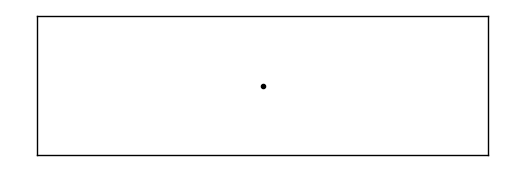

In [40]:
print(*seq, sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);